In [2]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mpi1 = pd.read_csv('../output/model_output_MPI1.csv')
mpi1 = mpi1.rename(columns={'Unnamed: 0': 'region'})

In [4]:
mpi3 = pd.read_csv('../output/model_output_MPI3.csv')
mpi3 = mpi3.rename(columns={'Unnamed: 0': 'region'})

In [5]:
mpi6 = pd.read_csv('../output/model_output_MPI6.csv')
mpi6 = mpi6.rename(columns={'Unnamed: 0': 'region'})

In [7]:
mpi1

,region,experimental_data,ndm_data,linreg_data,residual
0,iCg,-2.225813,-0.544678,-2.248156,0.022343
1,iAcb,-2.956333,-1.911413,-3.354282,0.397949
2,iTC,-3.924807,-1.875977,-3.325603,-0.599204
3,iAI,-1.266086,-0.453227,-2.174143,0.908056
4,iAI-b,-2.227776,-0.600824,-2.293596,0.065820
...,...,...,...,...,...
92,cS1-b,-2.098552,-1.192304,-2.772293,0.673740
93,cTeA,-2.482156,-0.873126,-2.513976,0.031820
94,cIns,-1.939102,-0.583390,-2.279486,0.340383
95,cV,-3.291294,-1.340118,-2.891922,-0.399372


In [19]:
mpi1.columns

Index(['region', 'experimental_data', 'ndm_data', 'linreg_data', 'residual'], dtype='object')

<AxesSubplot:xlabel='ndm_data', ylabel='experimental_data'>

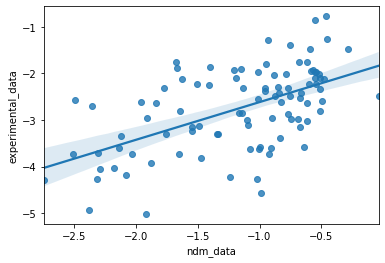

In [20]:
sns.regplot(x='ndm_data', y='experimental_data', data=mpi1)

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


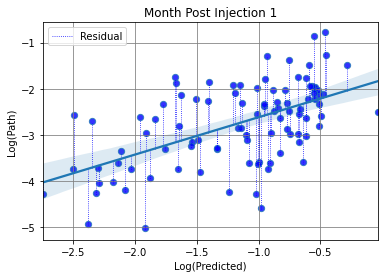

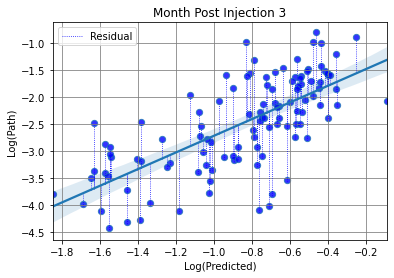

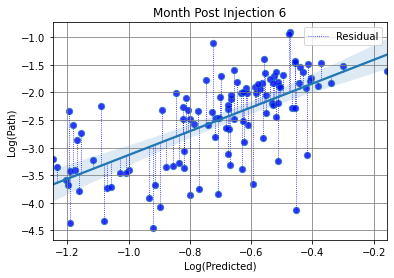

In [7]:
# Lollipops graph using vlines
mpi= [mpi1,mpi3,mpi6]
tp = [1,3,6]

for i in range (0, len(tp)):
    plt.figure()
    plt.vlines(mpi[i]["ndm_data"], mpi[i]['linreg_data'], mpi[i]['linreg_data']+mpi[i]['residual']-0.04, lw=0.8, color='blue', linestyles="dotted", label="Residual")
    sns.regplot(mpi[i]["ndm_data"], mpi[i]["experimental_data"], data=mpi[i], scatter_kws={'s':40, 'facecolor':'blue'})
    plt.xlabel("Log(Predicted)")
    plt.ylabel("Log(Path)")
    plt.title("Month Post Injection {}".format(tp[i]))
    plt.legend()
    plt.grid(color="grey")

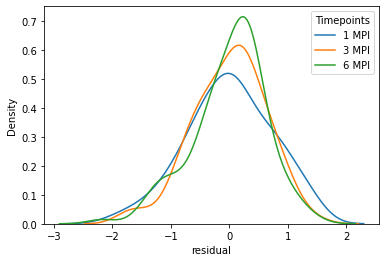

In [28]:
sns.kdeplot(x='residual', data=mpi1, label='1 MPI')
sns.kdeplot(x='residual', data=mpi3, label='3 MPI')
sns.kdeplot(x='residual', data=mpi6, label='6 MPI')
plt.legend(title='Timepoints')
plt.show()

In [11]:
patho = pd.read_csv('../output/predicted_pathology.csv')

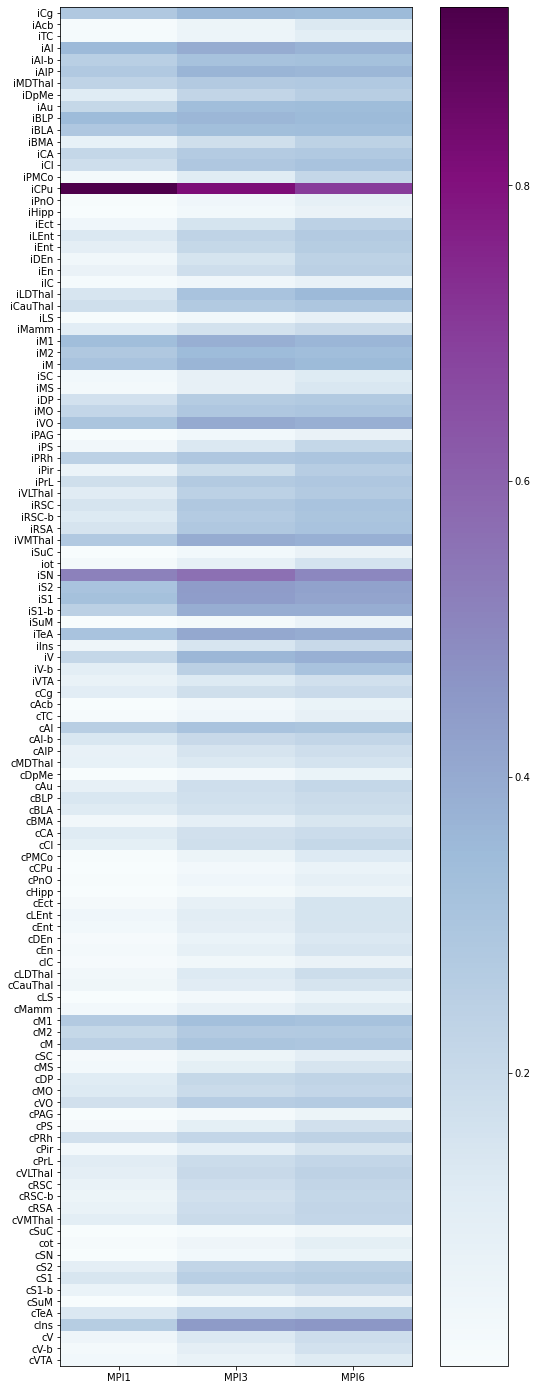

In [21]:
plt.figure(figsize=(10,25))
plt.imshow(patho[['MPI1','MPI3', 'MPI6']], cmap='BuPu', aspect=.1)
plt.yticks(np.arange(patho.shape[0]), patho['regions'])
plt.xticks(np.arange(patho.columns[1:4].shape[0]), patho.columns[1:4])
plt.colorbar()
plt.show()

In [19]:
patho.columns[1:4].shape[0]


TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [22]:
patho_no_seed = patho.drop(15)

In [23]:
norm_path = patho_no_seed[['MPI1','MPI3', 'MPI6']].values

In [24]:
norm_path = (norm_path - np.min(norm_path)) / (np.max(norm_path) - np.min(norm_path))

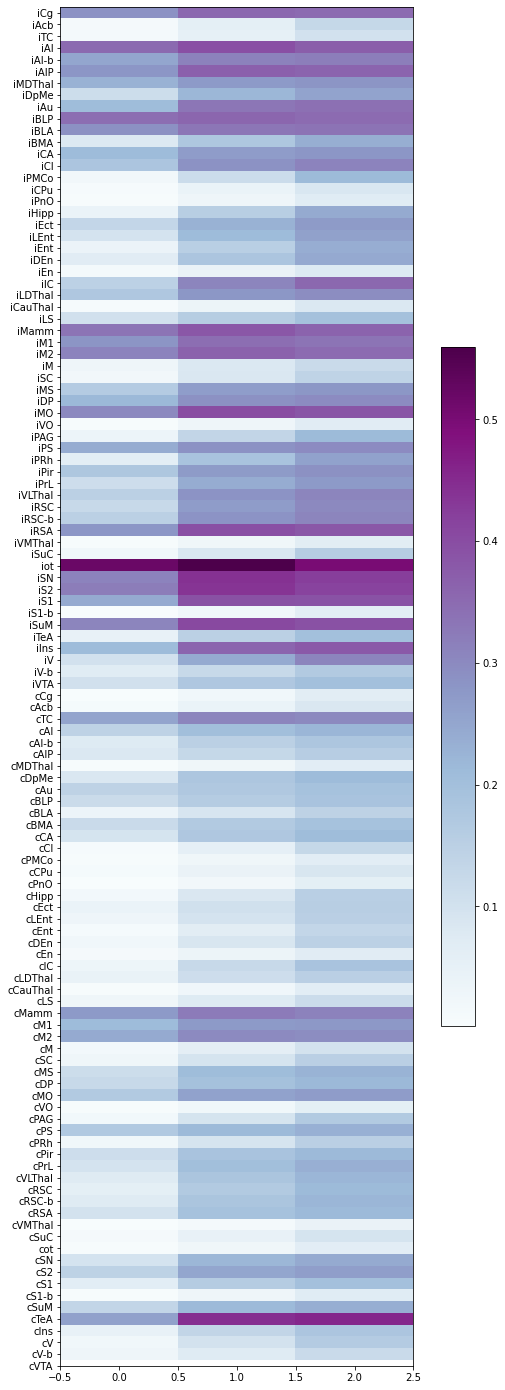

In [22]:
plt.figure(figsize=(10,25))
plt.imshow(patho_no_seed[['MPI1','MPI3', 'MPI6']], cmap='BuPu', aspect=.1)
plt.yticks(np.arange(patho.shape[0]), patho['regions'])
plt.colorbar(shrink=.5) 
plt.show()

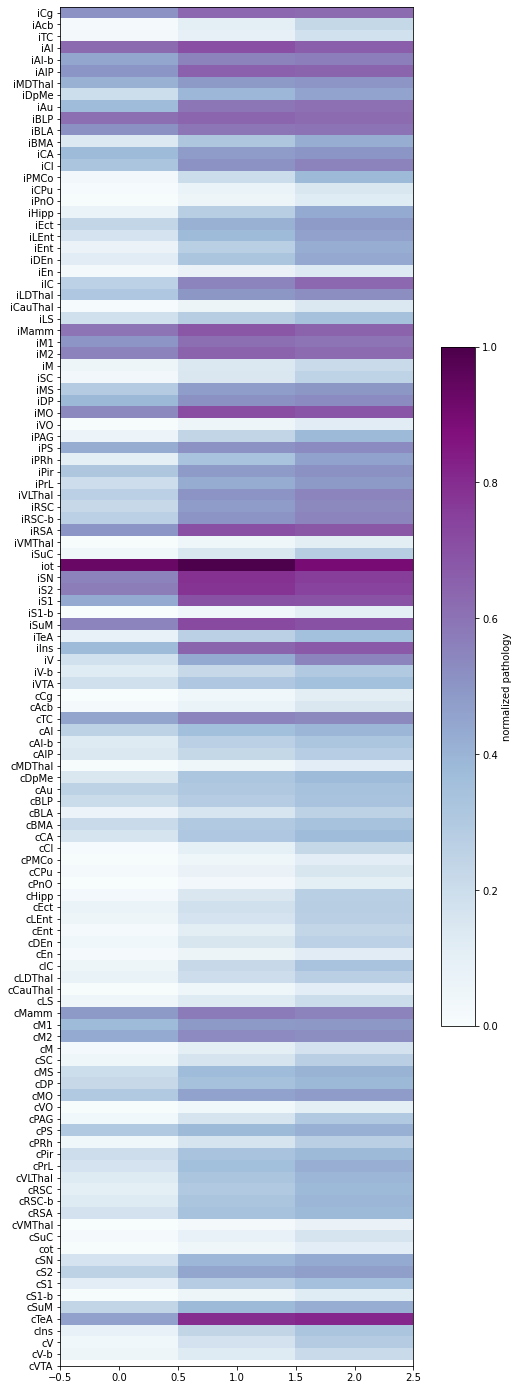

In [31]:
plt.figure(figsize=(10,25))
plt.imshow(norm_path, cmap='BuPu', aspect=.1)
plt.yticks(np.arange(patho.shape[0]), patho['regions'])
plt.colorbar(shrink=.5, label='normalized pathology')
plt.show()

In [33]:
cmap = plt.get_cmap('BuPu')

In [36]:
cmap(norm_path[0, 0])[:3]

(0.5490196078431373, 0.5750096116878124, 0.7700115340253749)

In [ ]:
add_brain_region('nom', color=cmap())

# Graph en S couché